In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
data = pd.read_csv('./Dataset/Complete Data/merged_data_16-24.csv')
data.head()

,date,water_level,precipitation,flood_occurred,precipitation_7days,precipitation_15days,precipitation_30days,water_level_t-1,water_level_t-2,precipitation_t-1,precipitation_t-2,precipitation_t-3,target_water_level,precipitation_t+1,precipitation_t+2,precipitation_t+3,precipitation_t+4,day,month,year
0,2016-01-01,9.3,0.0,False,0.0,0.0,0.0,9.3,9.3,0.0,0.0,0.0,9.3,0.0,0.0,0.0,0.0,1,1,2016
1,2016-01-02,9.3,0.0,False,0.0,0.0,0.0,9.3,9.3,0.0,0.0,0.0,9.3,0.0,0.0,0.0,0.0,2,1,2016
2,2016-01-03,9.3,0.0,False,0.0,0.0,0.0,9.3,9.3,0.0,0.0,0.0,9.3,0.0,0.0,0.0,0.0,3,1,2016
3,2016-01-04,9.3,0.0,False,0.0,0.0,0.0,9.3,9.3,0.0,0.0,0.0,9.3,0.0,0.0,0.0,0.0,4,1,2016
4,2016-01-05,9.3,0.0,False,0.0,0.0,0.0,9.3,9.3,0.0,0.0,0.0,9.3,0.0,0.0,0.0,0.0,5,1,2016


In [81]:
flood_data = data[data['flood_occurred'] == True]['water_level']

In [82]:
from scipy.stats import norm

# Fit Gaussian Distribution
mu, sigma = norm.fit(flood_data)

In [83]:
print(f'mean:{mu}, sig:{sigma}')

mean:15.984666739400229, sig:2.058729296111756


In [84]:
confidence_level = 0.95
z_score = norm.ppf(confidence_level)
print(z_score)

# Calculate upper flood threshold
upper_threshold = mu + (z_score * sigma)
lower_threshold = mu - (z_score * sigma)

1.6448536269514722


In [85]:
print(f'upper_threshold:{upper_threshold}, lower_threshold:{lower_threshold}')

upper_threshold:19.370975089020902, lower_threshold:12.598358389779555


In [86]:
data['anomaly'] = (data['water_level'] > upper_threshold).astype(int)

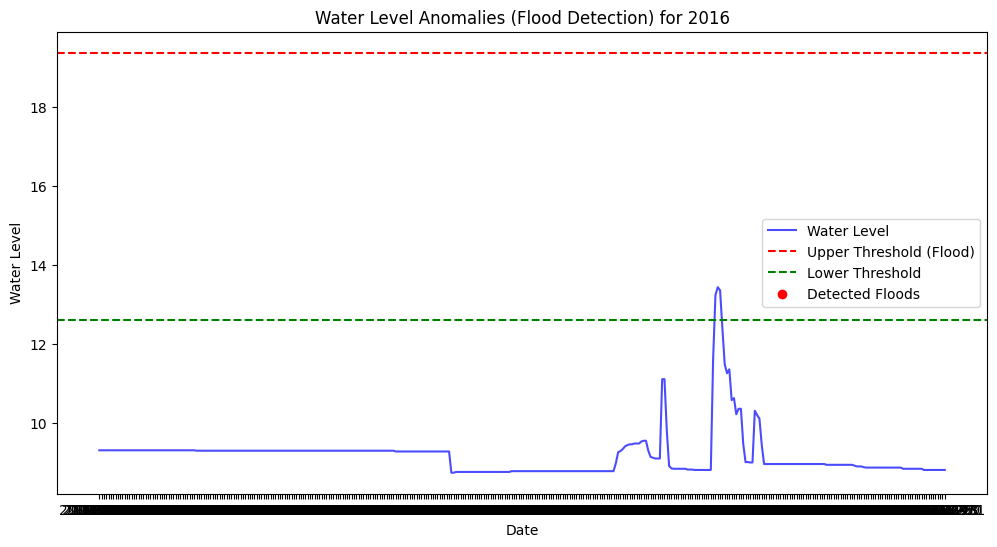

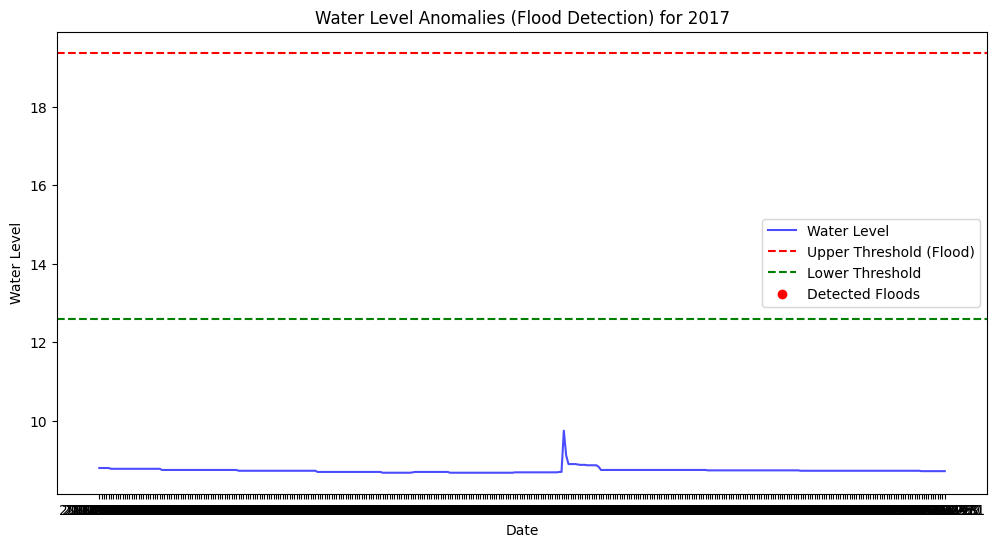

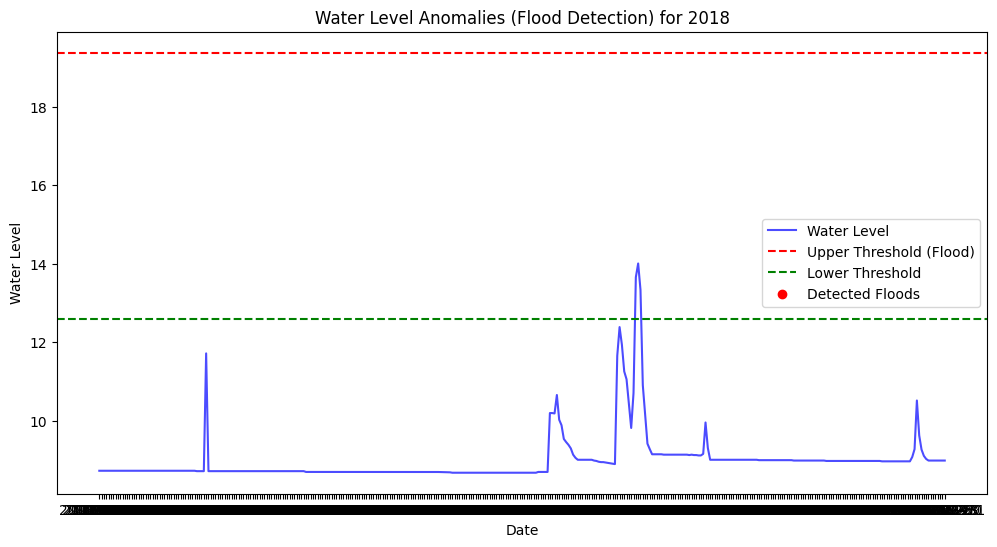

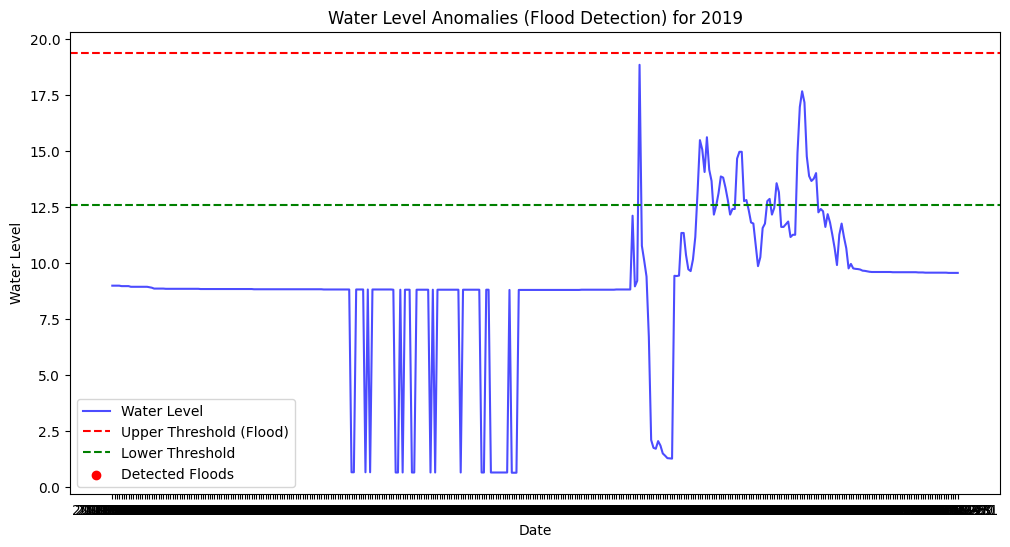

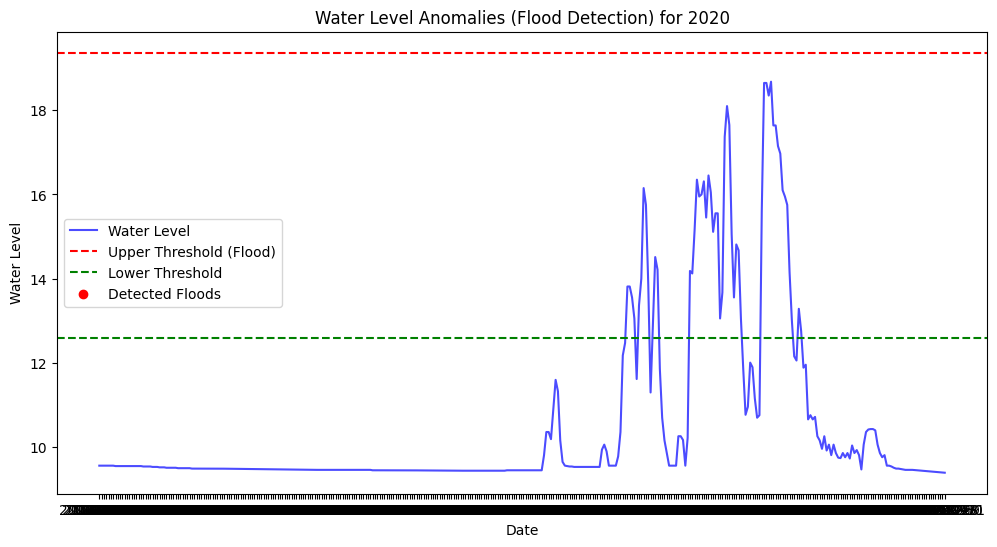

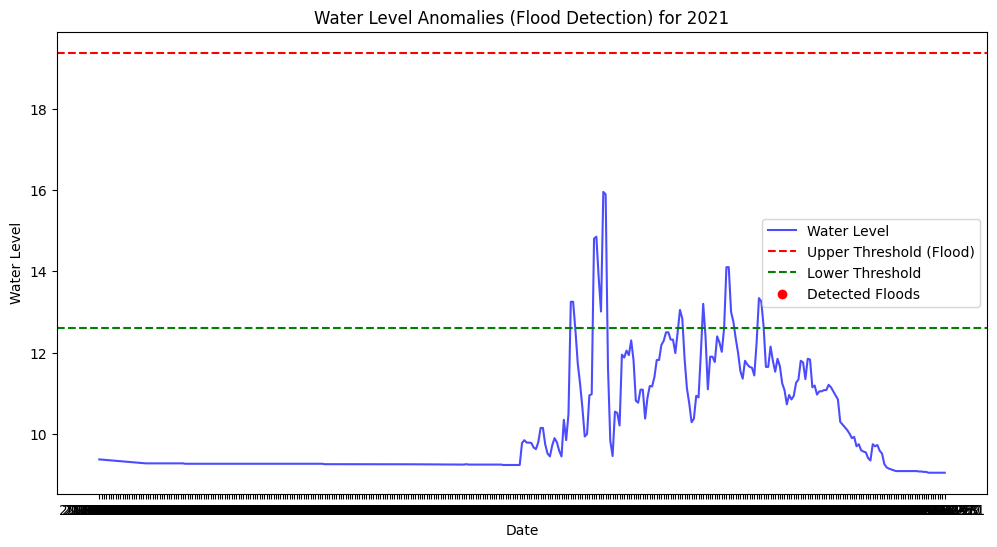

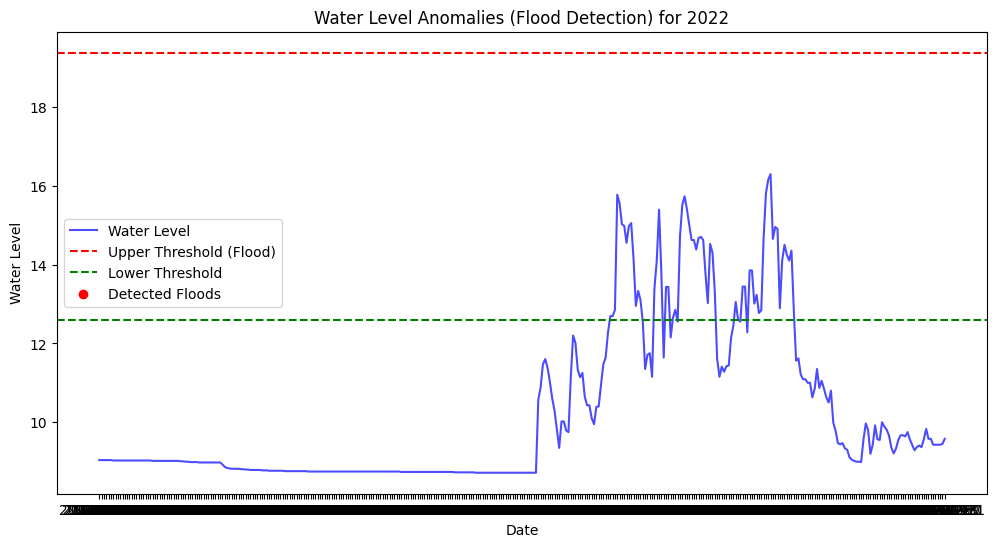

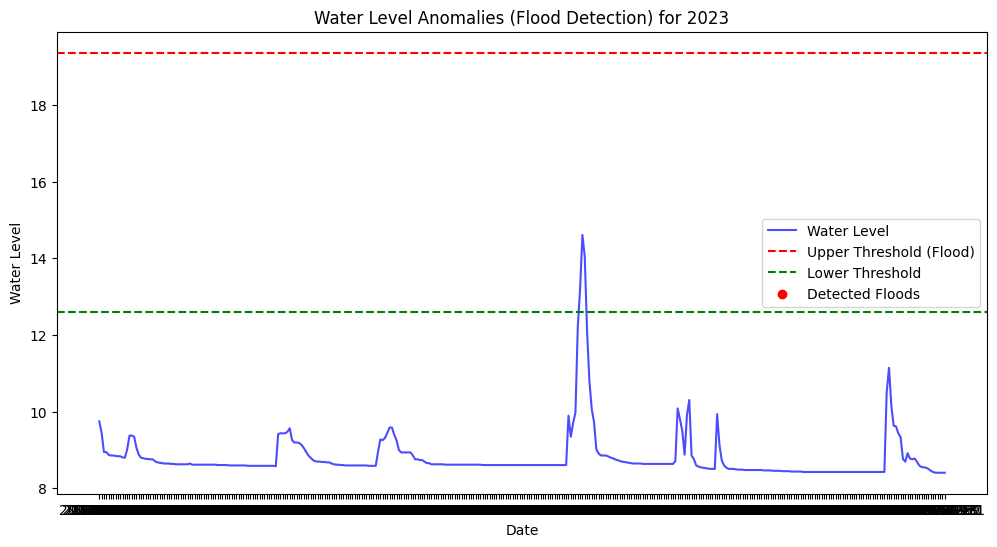

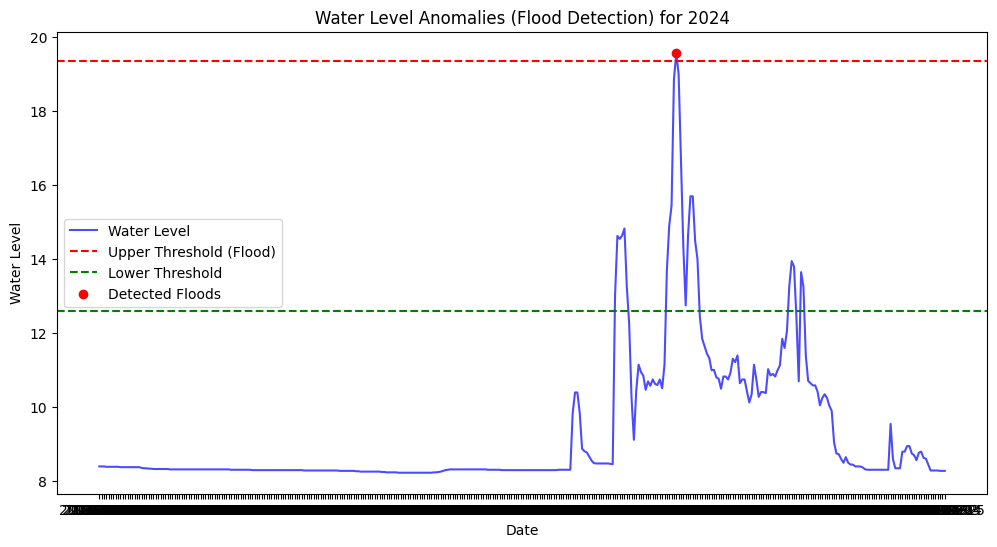

In [88]:
years = data['year'].unique()

for year in years:
    yearly_data = data[data['year'] == year]
    
    plt.figure(figsize=(12, 6))
    
    # Plot water levels
    plt.plot(yearly_data['date'], yearly_data['water_level'], label="Water Level", color='b', alpha=0.7)
    
    # Plot threshold lines
    plt.axhline(upper_threshold, color='r', linestyle='--', label="Upper Threshold (Flood)")
    plt.axhline(lower_threshold, color='g', linestyle='--', label="Lower Threshold")
    
    # Mark flood anomalies
    plt.scatter(
        yearly_data['date'][yearly_data['anomaly'] == 1],
        yearly_data['water_level'][yearly_data['anomaly'] == 1],
        color='r', label="Detected Floods", zorder=3
    )
    
    plt.xlabel("Date")
    plt.ylabel("Water Level")
    plt.title(f"Water Level Anomalies (Flood Detection) for {year}")
    plt.legend()
    plt.show()
